In [24]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
class CiliaDataSet(Dataset):
    def __init__(self, train_txt, root_dir, transform = None):
        self.annotations = pd.read_csv(train_txt)
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0], "data",self.annotations.iloc[index,0],"frame0000.png")
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image
    


In [36]:
ciliaDataObject = CiliaDataSet(train_txt= 'D:/MS/DataSciencePracticum/P3/train.txt', root_dir = 'D:/MS/DataSciencePracticum/P3/data',
                               transform=transforms.Compose([transforms.ToTensor()]) 
                              )                             
                               
                              
                            

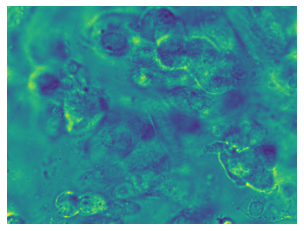

In [37]:
temp_img = ciliaDataObject[1]
plt.imshow(temp_img.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.show()